In [1]:
import sys
sys.path.append('..')
from sklearnex import patch_sklearn
patch_sklearn()
import pandas as pd
import numpy  as np
import gc
import warnings

from utils.data_preprocessing_utils import Utils

from mne.io import read_raw_edf, concatenate_raws
from mne.channels import make_standard_montage
from mne.datasets import eegbci
from mne.epochs import Epochs
import mne



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
data_path = "C:/Users/Maods/Documents/Code-Samples/Python/MI-EEG-Dataset/dataset/original/S001/S001R04.edf"

In [3]:
raw_run = read_raw_edf(data_path, preload=True) 

Extracting EDF parameters from C:\Users\Maods\Documents\Code-Samples\Python\MI-EEG-Dataset\dataset\original\S001\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


In [4]:
raw_run.annotations.description

array(['T0', 'T2', 'T0', 'T1', 'T0', 'T1', 'T0', 'T2', 'T0', 'T2', 'T0',
       'T1', 'T0', 'T2', 'T0', 'T1', 'T0', 'T2', 'T0', 'T1', 'T0', 'T1',
       'T0', 'T2', 'T0', 'T1', 'T0', 'T2', 'T0', 'T1'], dtype='<U2')

In [5]:
raw_run.annotations.duration

array([4.2, 4.1, 4.2, 4.1, 4.2, 4.1, 4.2, 4.1, 4.2, 4.1, 4.2, 4.1, 4.2,
       4.1, 4.2, 4.1, 4.2, 4.1, 4.2, 4.1, 4.2, 4.1, 4.2, 4.1, 4.2, 4.1,
       4.2, 4.1, 4.2, 4.1])

In [6]:
np.sum(raw_run._annotations.duration)

124.49999999999999

In [7]:
raw_run.crop(tmax=124) 
np.sum(raw_run._annotations.duration)

124.00625

In [8]:
raw_run

<RawEDF | S001R04.edf, 64 x 19841 (124.0 s), ~9.8 MB, data loaded>

In [9]:
raw_run.annotations.description

array(['T0', 'T2', 'T0', 'T1', 'T0', 'T1', 'T0', 'T2', 'T0', 'T2', 'T0',
       'T1', 'T0', 'T2', 'T0', 'T1', 'T0', 'T2', 'T0', 'T1', 'T0', 'T1',
       'T0', 'T2', 'T0', 'T1', 'T0', 'T2', 'T0', 'T1'], dtype='<U2')

In [10]:
data_path = "C:/Users/Maods/Documents/Code-Samples/Python/MI-EEG-Dataset/dataset/original/"
runs = [4, 6, 8, 10, 12, 14]
subjects = [1]
l = Utils.load_data(subjects, runs, data_path)

Extracting EDF parameters from C:\Users\Maods\Documents\Code-Samples\Python\MI-EEG-Dataset\dataset\original\S001\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
1
Extracting EDF parameters from C:\Users\Maods\Documents\Code-Samples\Python\MI-EEG-Dataset\dataset\original\S001\S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
1
Extracting EDF parameters from C:\Users\Maods\Documents\Code-Samples\Python\MI-EEG-Dataset\dataset\original\S001\S001R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
1
Extracting EDF parameters from C:\Users\Maods\Documents\Code-Samples\Python\MI-EEG-Dataset\dataset\original\S001\S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.

In [11]:
subj = concatenate_raws(l[0])

In [12]:
subj._annotations.description

array(['B', 'R', 'B', 'L', 'B', 'L', 'B', 'R', 'B', 'R', 'B', 'L', 'B',
       'R', 'B', 'L', 'B', 'R', 'B', 'L', 'B', 'L', 'B', 'R', 'B', 'L',
       'B', 'R', 'B', 'L', 'BAD boundary', 'EDGE boundary', 'B', 'F', 'B',
       'LR', 'B', 'LR', 'B', 'F', 'B', 'LR', 'B', 'F', 'B', 'F', 'B',
       'LR', 'B', 'LR', 'B', 'F', 'B', 'F', 'B', 'LR', 'B', 'LR', 'B',
       'F', 'B', 'F', 'BAD boundary', 'EDGE boundary', 'B', 'L', 'B', 'R',
       'B', 'L', 'B', 'R', 'B', 'L', 'B', 'R', 'B', 'L', 'B', 'R', 'B',
       'R', 'B', 'L', 'B', 'L', 'B', 'R', 'B', 'R', 'B', 'L', 'B', 'L',
       'BAD boundary', 'EDGE boundary', 'B', 'LR', 'B', 'F', 'B', 'F',
       'B', 'LR', 'B', 'F', 'B', 'LR', 'B', 'LR', 'B', 'F', 'B', 'F', 'B',
       'LR', 'B', 'LR', 'B', 'F', 'B', 'F', 'B', 'LR', 'B', 'F',
       'BAD boundary', 'EDGE boundary', 'B', 'R', 'B', 'L', 'B', 'R', 'B',
       'L', 'B', 'L', 'B', 'R', 'B', 'R', 'B', 'L', 'B', 'L', 'B', 'R',
       'B', 'R', 'B', 'L', 'B', 'R', 'B', 'L', 'B', 'R', 'BAD b

In [13]:
subj.ch_names

['Fc5.',
 'Fc3.',
 'Fc1.',
 'Fcz.',
 'Fc2.',
 'Fc4.',
 'Fc6.',
 'C5..',
 'C3..',
 'C1..',
 'Cz..',
 'C2..',
 'C4..',
 'C6..',
 'Cp5.',
 'Cp3.',
 'Cp1.',
 'Cpz.',
 'Cp2.',
 'Cp4.',
 'Cp6.',
 'Fp1.',
 'Fpz.',
 'Fp2.',
 'Af7.',
 'Af3.',
 'Afz.',
 'Af4.',
 'Af8.',
 'F7..',
 'F5..',
 'F3..',
 'F1..',
 'Fz..',
 'F2..',
 'F4..',
 'F6..',
 'F8..',
 'Ft7.',
 'Ft8.',
 'T7..',
 'T8..',
 'T9..',
 'T10.',
 'Tp7.',
 'Tp8.',
 'P7..',
 'P5..',
 'P3..',
 'P1..',
 'Pz..',
 'P2..',
 'P4..',
 'P6..',
 'P8..',
 'Po7.',
 'Po3.',
 'Poz.',
 'Po4.',
 'Po8.',
 'O1..',
 'Oz..',
 'O2..',
 'Iz..']

Using matplotlib as 2D backend.
Opening raw-browser...


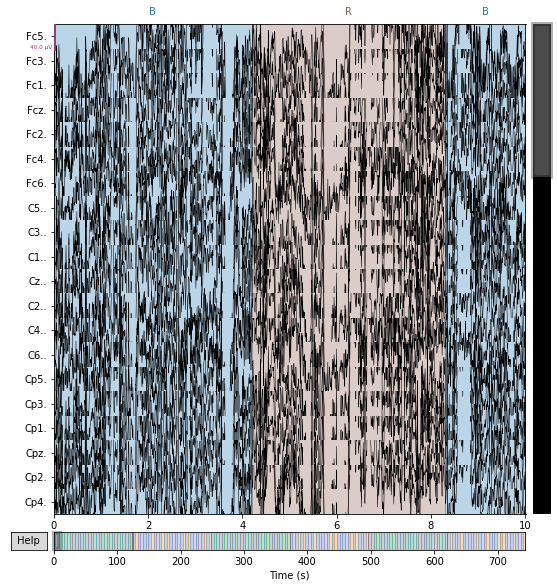

In [14]:
subj.plot();
# try to do it without matplotlib configuration you did up in the lib import 

In [15]:
run = raw_run.copy()

eegbci.standardize(run)  # Cambio n_epoch nomi dei canali
montage = make_standard_montage('standard_1005')  # Caricare il montaggio
run.set_montage(montage)

<RawEDF | S001R04.edf, 64 x 19841 (124.0 s), ~9.8 MB, data loaded>

In [16]:



ica = mne.preprocessing.ICA(n_components=20, random_state=0)

In [17]:
ica.fit(run.copy().filter(8,35))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 265 samples (1.656 sec)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 0.4s.


Method,fastica
Fit,31 iterations on raw data (19841 samples)
ICA components,20
Explained variance,98.4 %
Available PCA components,64
Channel types,eeg
ICA components marked for exclusion,—


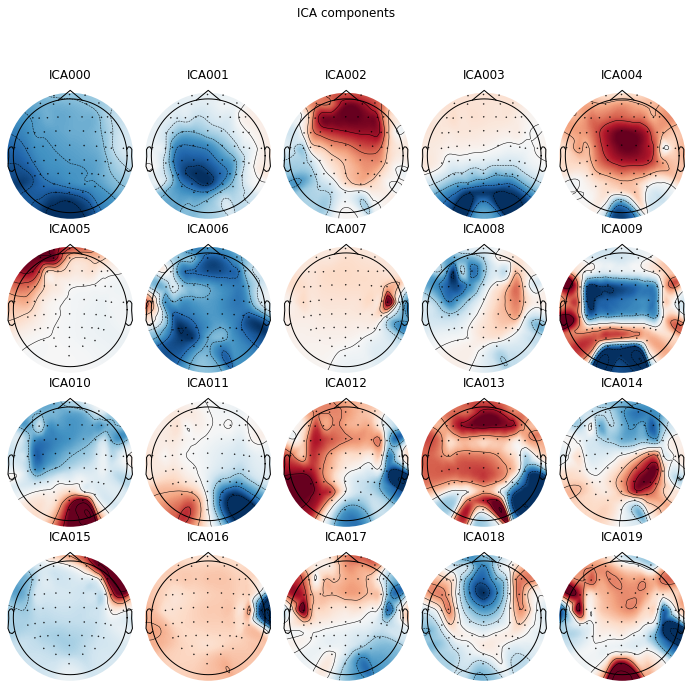

In [18]:
ica.plot_components();